In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
wood_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [6]:
wood_rankings.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [4]:
steel_rankings.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [42]:
def roller_ranking(roller_name,park,df_name):
    
    """Plots the ranking of each roller coster vs time"""

    df = df_name[(df_name.Name == roller_name)&(df_name.Park == park)]
    
    ax = plt.subplot(1,1,1)
    plt.plot(df['Year of Rank'],df['Rank'])
    plt.xlabel("Year")
    plt.ylabel("Rank")
    ax.set_yticks([i for i in range(1,max(df['Rank']+1))])
    ax.set_xticks(df["Year of Rank"])
    ax.invert_yaxis()
    plt.show()

In [58]:
df = steel_rankings[(steel_rankings.Name == "Nitro")&(steel_rankings.Park == "Six Flags Great Adventure")]
df

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
14,5,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,563,2014
24,5,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,650,2015
34,5,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,454,2016
86,7,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,442,2017
140,11,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,345,2018


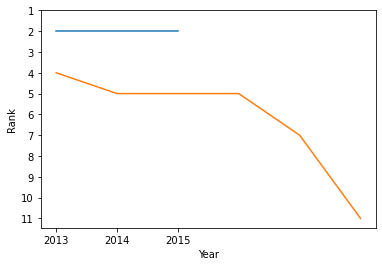

In [60]:
compare_rankings("Bizarro","Six Flags New England","Nitro","Six Flags Great Adventure",steel_rankings)

In [69]:
def compare_rankings(roller1,park1,roller2,park2,df_name):
    
    df1 = df_name[(df_name.Name == roller1)&(df_name.Park == park1)]
    df2 = df_name[(df_name.Name == roller2)&(df_name.Park == park2)]
    
    yticks_max = max(max(df1["Rank"]),max(df2["Rank"]))
    
    ax = plt.subplot(1,1,1)
    plt.plot(df1['Year of Rank'],df1['Rank'])
    plt.plot(df2['Year of Rank'],df2['Rank'])
    plt.xlabel("Year")
    plt.ylabel("Rank")
    ax.set_yticks([i for i in range(1,yticks_max+1)])
    ax.set_xticks([i for i in range(2013,2018+1)])
    ax.invert_yaxis()
    plt.legend([roller1,roller2])
    plt.show()
    

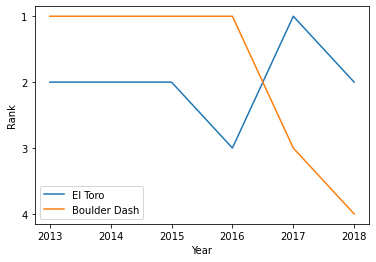

In [70]:
compare_rankings("El Toro","Six Flags Great Adventure","Boulder Dash","Lake Compounce",wood_rankings)

In [74]:
roller_rankings = pd.read_csv('roller_coasters.csv')

In [75]:
roller_rankings.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [84]:
def plot_histogram(df_name,column_name):
    temp_df = df_name[column_name].dropna()
    plt.hist(temp_df)
    plt.show()

In [ ]:
def inv_graph(df_name,park_name):
    
    df = df_name[df_name['park'] == park_name]
    names = df['name']
    ax = plt.subplot(1,1,1)
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names,rotation='90')
    plt.bar(range(len(df['name'])),df['num_inversions'])
    plt.show()

In [147]:
def operating_chart(df_name):
    
    series = df_name.groupby('status').name.count()
    operating = series['status.operating']
    closed = series['status.closed.definitely']
    plt.pie([operating,closed],labels=['Operating','Closed'],autopct='%.2f%%')
    plt.axis('equal')
    plt.show()

In [149]:
def compare_scatter(df_name,column1,column2):
    
    plt.scatter(df_name[column1],df_name[column2])
    plt.show()

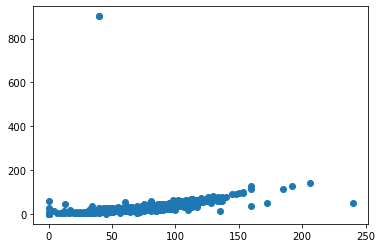

In [152]:
compare_scatter(roller_rankings,'speed','height')